<a href="https://colab.research.google.com/github/Rayan757575/deterministic-model/blob/main/CodingActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Activity: Vaccines

Based on the model presented in the article "On the use of Gillespie stochastic simulation algorithm in a model of the human immune system response to the Yellow Fever vaccine" https://doi.org/10.1109/BIBM.2017.8217880,  simulate the deterministic model exactly as described in the article.

## 1: Import Required Libraries

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## 2: Define the system of the ODE

In [ ]:
# Mathematical model methods
def system(t, y):
    V, Bn, Ba, Bm, A = y

    dV_dt = C1 * V - C2 * V * A
    dBn_dt = C3 * (Bn0 - Bn) - C4 * V * Bn
    dBa_dt = C4 * V * Bn - C5 * Ba + C6 * Bm * V - C7 * Ba
    dBm_dt = C5 * Ba + C8 * Bm * (1 - Bm / BMmax) - C6 * Bm * V
    dA_dt = C9 * Ba + C10 * Bm - C11 * A
    return [dV_dt, dBn_dt, dBa_dt, dBm_dt, dA_dt]

## 3: Initial parameters and Time Span

### Defining the initial conditions

In [ ]:
# 1. Variables and their initial values
V = 10 # Local Virus
Bn = 350 # Naive B cells
Bn0 = Bn # Initial value of Naive B cells
Ba = 0 # Active B cells
Bm = 0 # Memory B cells
A = 0 # Antibodies

# 2. Parameters and their values
C1 = 9.0e-1
C2 = 2.0e-3
C3 = 2.0e-2
C4 = 8.6e-4
C5 = 2.3e-4
C5s = 2.3e-4
C6 = 1.02e-2
C6 = 8.2e-3
C7 = 3.7e-1
C8 = 1.0
C9 = 3.2
C10 = 3.6e-1
C11 = 4.0e-2
BMmax = 5.0e+1

### Time Span

In [ ]:
y0 = [V, Bn, Ba, Bm, A] # Initial values for variables V, Bn, Ba, Bm and A
t_span = (0, 100) # Time interval from 0 to 50 days
t_eval = np.linspace(t_span[0], t_span[1], 500) # Points at which to evaluate the solution

## 4: Solve the System with solve_ivp

In [ ]:
solution = solve_ivp(
    fun=system,
    t_span=t_span,
    y0=y0,
    method='RK45',
    t_eval=t_eval
)

## 5: Plot the Results

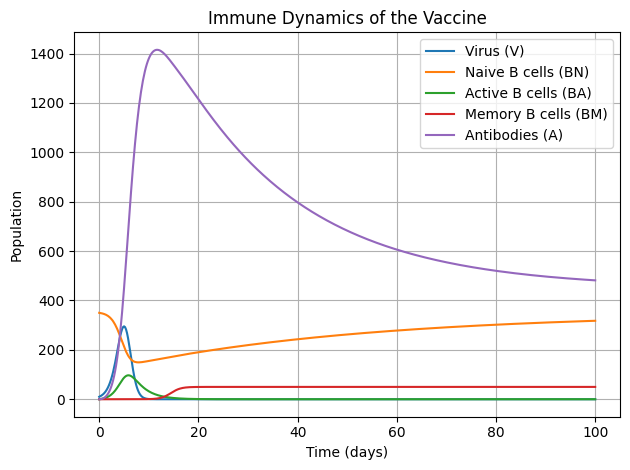

In [ ]:
# plt.figure(figsize=(10, 5))  # Increase the width of the graphic
labels = ['Virus (V)', 'Naive B cells (BN)', 'Active B cells (BA)', 'Memory B cells (BM)', 'Antibodies (A)']
for i in range(5):
    plt.plot(solution.t, solution.y[i], label=labels[i])

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Immune Dynamics of the Vaccine')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Practical Activity: Cancer and the Immune System

Solve the mathematical model presented in the article “A Mathematical Model of the Enhancement of Tumor Vaccine Efficacy by Immunotherapy,” available at  https://doi.org/10.1007/s11538-012-9722-4. Reproduce the simulations shown in Figs. 2, 3, 4, and 5. Use the following initial conditions for the no-vaccine case:
  \begin{align*}
    T_0 &= 3.0 & B_0 &= 0.0\\
    E_0 &= 100.0 &R_0 &= 0.0\\
    V_0 &= 0.0&&\\
  \end{align*}
  
  For the vaccine case, consider $V_0 = 5000.0$. The remaining parameters are available in Table 1 of the article.

## 1: Import Required Libraries

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## 2: Define the system of the ODE

In [ ]:
# Mathematical model methods
def tumor_system(t, y, regime):
    T, B, E, R, V= y

    # TGF-β inhibition that alters c2
    if regime in ['antiTGFb', 'combined']:
      c2 = 7000
    else:
      c2 = 3e+2

    # Define the function g(t, regime)
    def g(t, regime):
        if regime in ['vaccine', 'combined']:
            return 5000.0
        else:
            return 0.0

    dT_dt = a0 * T * (1 - c0 * T) - delta0 * (E * T /(1 + c1 * B)) - delta0 * T * V
    dB_dt = a1 * (T ** 2 /(c2 + T ** 2)) - d * B
    dE_dt = f * E * T /(1 + c3 * T * B) - r * E - delta0 * R * E - delta1 * E
    dR_dt = r * E - delta1 * R
    dV_dt = g(t, regime) - delta1 * V
    return [dT_dt, dB_dt, dE_dt, dR_dt, dV_dt]

## 3: Initial parameters and Time Span

### Defining the initial conditions

In [ ]:
# 1. Variables and their initial values
def get_initial_conditions(regime):
    T0 = 3.0
    B0 = 0.0
    E0 = 100.0
    R0 = 0.0
    V0 = 5000.0 if regime in ['vaccine', 'combined'] else 0.0
    return [T0, B0, E0, R0, V0]


# 2. Parameters and their values

a0 = 1.946e-1 # tumor growth rate
c0 = 1/369 # tumor carrying capacity
delta0 = 1e-5 # effector T-cell induced tumor death rate/removal rate of CTLs by Tregs
c1 = 1e+2 # TGF-β inhibitory parameter for CTL induction of tumor death
a1 = 3e-1 # maximal production rate of TGF-β
c2 = 3e+2 # steepness coefficient of TGF-β production
d = 7e-4 # degradation rate of TGF-β
f = 6.2e-1 # tumor antigenicity
c3 = 3e+2 # combined tumor growth and TGF-β inhibitory parameter for activation of CTLs
r = 1e-2 # rate of effector T cells that become regulatory T cells
delta1 = 1e-5 # natural death of CTLs, Vaccine cells, and Tregs
g0 = 5e+3
Gt = g0

### Time Span

In [ ]:
t_span = (0, 30) # Time interval from 0 to 50 days
t_eval = np.linspace(t_span[0], t_span[1], 1000) # Points at which to evaluate the solution
regimes = ['control', 'vaccine', 'antiTGFb', 'combined'] # Simulations for the 4 regimes
results = {}

for regime in regimes:
    y0 = get_initial_conditions(regime)
    sol = solve_ivp(tumor_system, t_span, y0, args=(regime,), t_eval=t_eval, rtol=1e-6, atol=1e-8)
    results[regime] = sol

## 4: Solve the System with solve_ivp

In [ ]:
solution = solve_ivp(
    fun=system,
    t_span=t_span,
    y0=y0,
    method='RK45',
    t_eval=t_eval
)

## 5: Plot the Results

### Figure 2:

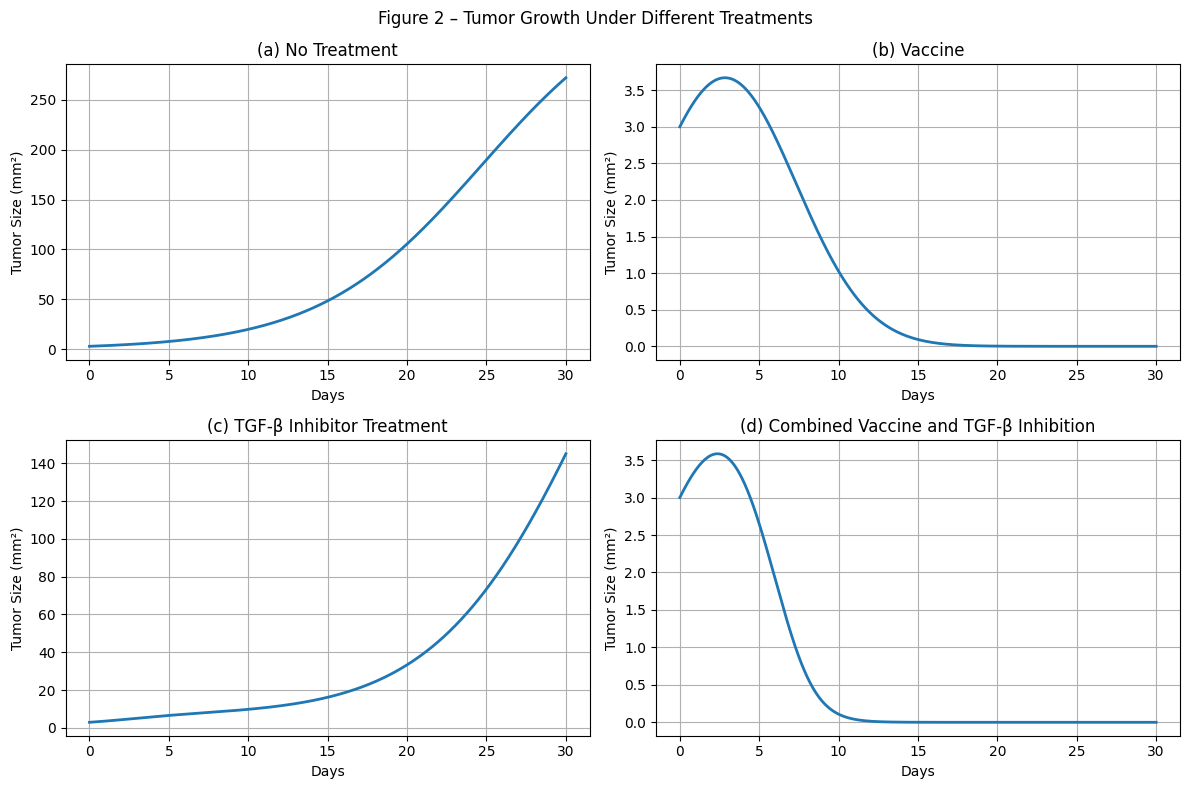

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
titles = {
    'control': '(a) No Treatment',
    'vaccine': '(b) Vaccine',
    'antiTGFb': '(c) TGF-β Inhibitor Treatment',
    'combined': '(d) Combined Vaccine and TGF-β Inhibition'
}

for i, regime in enumerate(regimes):
    ax = axs[i//2, i%2]
    ax.plot(results[regime].t, results[regime].y[0], lw=2)
    ax.set_title(titles[regime])
    ax.set_xlabel('Days')
    ax.set_ylabel('Tumor Size (mm²)')
    ax.grid()

fig.suptitle('Figure 2 – Tumor Growth Under Different Treatments')
plt.tight_layout()
plt.show()


### Figure 3:

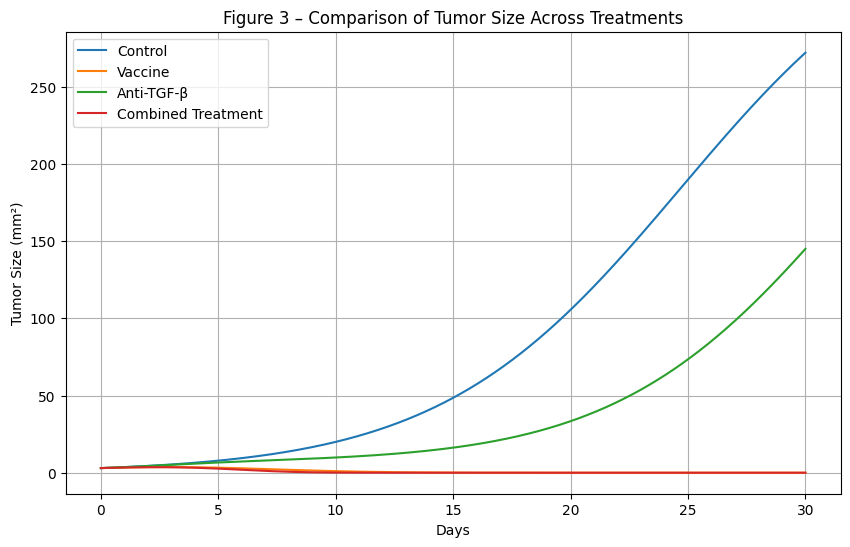

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(results['control'].t, results['control'].y[0], label='Control')
plt.plot(results['vaccine'].t, results['vaccine'].y[0], label='Vaccine')
plt.plot(results['antiTGFb'].t, results['antiTGFb'].y[0], label='Anti-TGF-β')
plt.plot(results['combined'].t, results['combined'].y[0], label='Combined Treatment')

plt.title('Figure 3 – Comparison of Tumor Size Across Treatments')
plt.xlabel('Days')
plt.ylabel('Tumor Size (mm²)')
plt.legend()
plt.grid()
plt.show()

### Figure 4

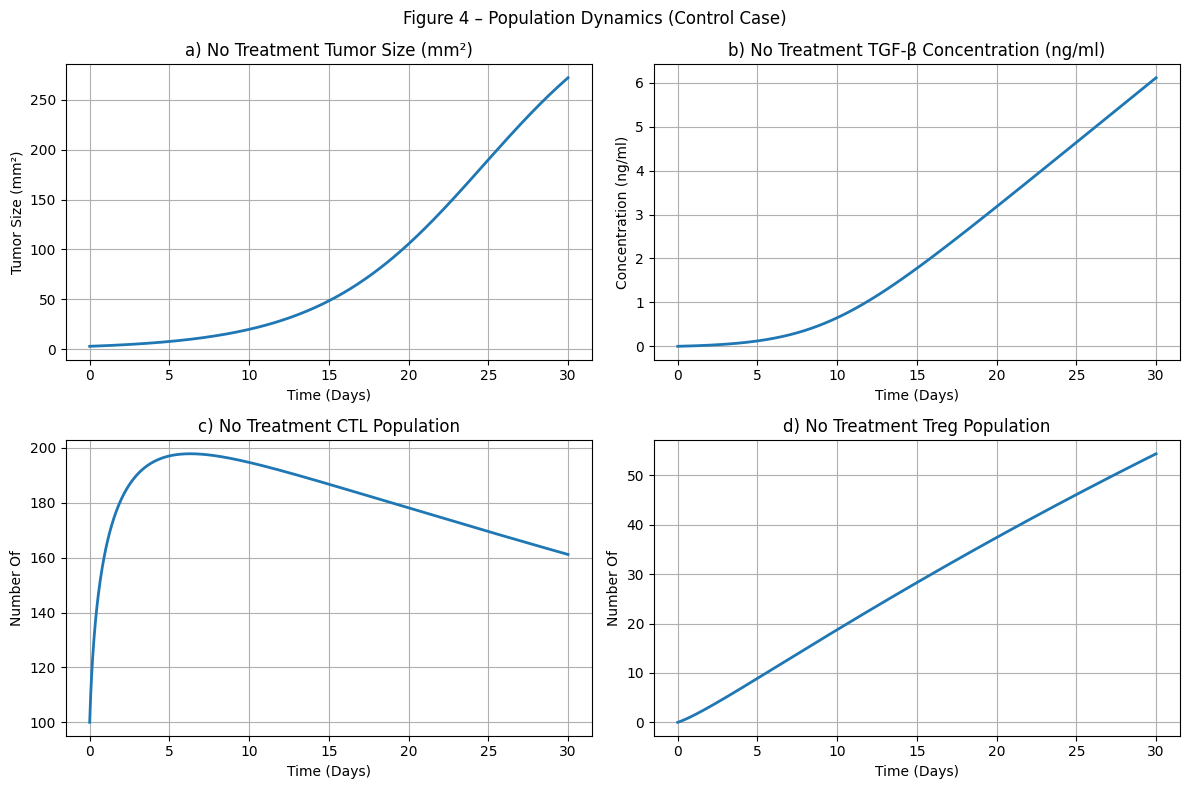

In [ ]:
T_ctrl, B_ctrl, E_ctrl, R_ctrl, V_ctrl = results['control'].y
t_ctrl = results['control'].t

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0,0].plot(t_ctrl, T_ctrl, lw=2)
axs[0,0].set_title('a) No Treatment Tumor Size (mm²)')
axs[0,0].set_ylabel('Tumor Size (mm²)')

axs[0,1].plot(t_ctrl, B_ctrl, lw=2)
axs[0,1].set_title('b) No Treatment TGF-β Concentration (ng/ml)')
axs[0,1].set_ylabel('Concentration (ng/ml)')

axs[1,0].plot(t_ctrl, E_ctrl, lw=2)
axs[1,0].set_title('c) No Treatment CTL Population')
axs[1,0].set_ylabel('Number Of')

axs[1,1].plot(t_ctrl, R_ctrl, lw=2)
axs[1,1].set_title('d) No Treatment Treg Population')
axs[1,1].set_ylabel('Number Of')

fig.suptitle('Figure 4 – Population Dynamics (Control Case)')
for ax in axs.flat:
    ax.set_xlabel('Time (Days)')
    ax.grid()
plt.tight_layout()
plt.show()


###Figure 5:

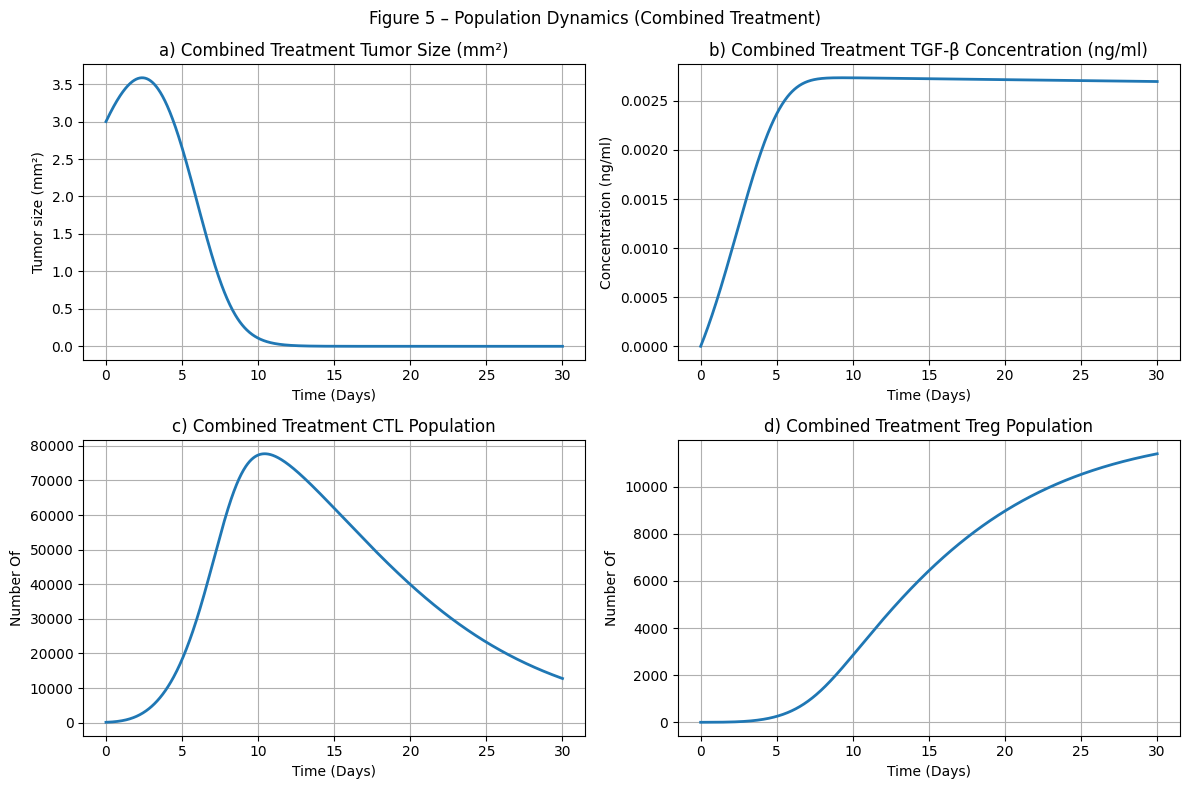

In [ ]:
T_comb, B_comb, E_comb, R_comb, V_comb = results['combined'].y
t_comb = results['combined'].t

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0,0].plot(t_comb, T_comb, lw=2)
axs[0,0].set_title('a) Combined Treatment Tumor Size (mm²)')
axs[0,0].set_ylabel('Tumor size (mm²)')

axs[0,1].plot(t_comb, B_comb, lw=2)
axs[0,1].set_title('b) Combined Treatment TGF-β Concentration (ng/ml)')
axs[0,1].set_ylabel('Concentration (ng/ml)')

axs[1,0].plot(t_comb, E_comb, lw=2)
axs[1,0].set_title('c) Combined Treatment CTL Population')
axs[1,0].set_ylabel('Number Of')

axs[1,1].plot(t_comb, R_comb, lw=2)
axs[1,1].set_title('d) Combined Treatment Treg Population')
axs[1,1].set_ylabel('Number Of')

fig.suptitle('Figure 5 – Population Dynamics (Combined Treatment)')
for ax in axs.flat:
    ax.set_xlabel('Time (Days)')
    ax.grid()
plt.tight_layout()
plt.show()
